In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 

## 1. Format the Data

In [3]:
df = pd.read_csv('../../assets/datasets/airport2.csv')
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


In [4]:
df.dtypes

Airport                    object
Year                        int64
Departure Cancellations     int64
Arrival Cancellations       int64
Departure Diversions        int64
Arrival Diversions          int64
dtype: object

Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [5]:
df['Airport'].unique()

array(['ABQ', 'ANC', 'ATL'], dtype=object)

In [6]:
airport_map = {
    'ABQ' : 0,
    'ANC' : 1,
    'ATL' : 2
}

In [7]:
df1 = df.copy()

In [10]:
df1.loc[:, 'Airport'] =  df1['Airport'].apply(lambda x : airport_map[x])

In [11]:
df1.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,2004,242,235,71,46
1,0,2005,221,190,61,33
2,0,2006,392,329,71,124
3,0,2007,366,304,107,45
4,0,2008,333,300,79,42


## 2. Plot the data

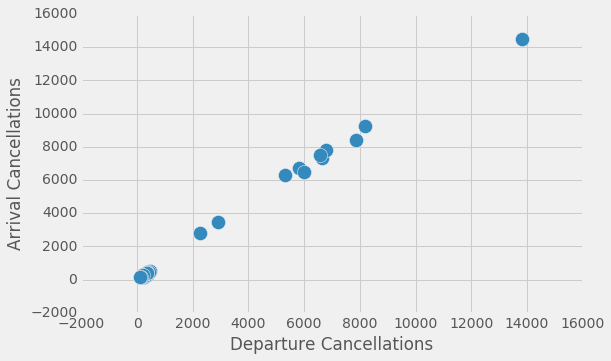

In [27]:
df1.plot.scatter(x = 'Departure Cancellations', y = 'Arrival Cancellations', figsize = (8,5), s = 200)

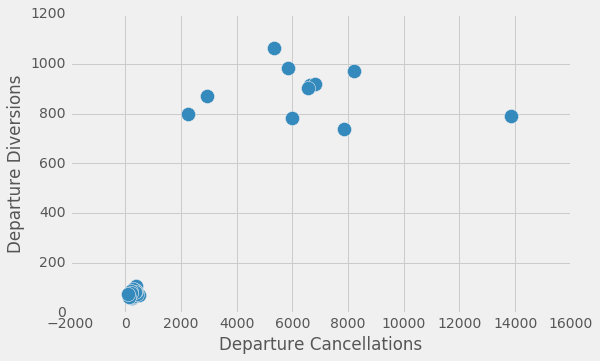

In [28]:
df1.plot.scatter(x = 'Departure Cancellations', y = 'Departure Diversions', figsize = (8,5), s = 200)

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [14]:
from sklearn.cluster import KMeans

In [15]:
df1.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,2004,242,235,71,46
1,0,2005,221,190,61,33
2,0,2006,392,329,71,124
3,0,2007,366,304,107,45
4,0,2008,333,300,79,42


In [16]:
y = df1['Airport']
X = df1.iloc[:, 1:]

In [18]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

#### 3.2 Conduct the k-means clustering

In [22]:
kmean = KMeans(n_clusters=3)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### 3.3 Compute the labels and centroids

In [65]:
pred = kmean.labels_
print pred

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 1 1 0]


In [66]:
kmean.cluster_centers_

array([[  2008.625     ,   6646.75      ,   7472.25      ,    908.875     ,
           900.5       ],
       [  2009.29166667,    471.875     ,    526.66666667,    140.375     ,
            98.08333333],
       [  2005.        ,  13837.        ,  14480.        ,    790.        ,
          1080.        ]])

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [55]:
from scipy.stats import mode

print 'predicted mode', mode(pred)[0][0]
print 'actual mode', mode(y)[0][0]

predicted mode 1
actual mode 0


In [56]:
pred = pd.DataFrame(pred, columns = ['Predicted labels'])

In [60]:
y.value_counts()

2    11
1    11
0    11
Name: Airport, dtype: int64

In [58]:
pred['Predicted labels'].value_counts()

1    24
0     8
2     1
Name: Predicted labels, dtype: int64

In [67]:
from scipy import stats
labels = np.zeros_like(pred)
for i in range(3):
    mask = (pred == i)
    labels[mask] = stats.mode(y[mask])[0]

In [68]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2], dtype=int32)

In [51]:
pred['Predicted labels'] = pred['Predicted labels'].apply(lambda x: 1 if x == 0 else (0 if x == 1 else 2))

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y, labels)

0.60606060606060608

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
print confusion_matrix(y, pred)

[[ 0 11  0]
 [ 0 11  0]
 [ 8  2  1]]


In [72]:
print classification_report(y, pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.46      1.00      0.63        11
          2       1.00      0.09      0.17        11

avg / total       0.49      0.36      0.27        33



**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier


In [78]:
et = ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [83]:
# Feature importance

et_feat = pd.DataFrame(et.feature_importances_, index = X.columns)
et_feat.sort_values(0, ascending = False)

,0
Arrival Diversions,0.337619
Departure Diversions,0.218184
Departure Cancellations,0.197803
Arrival Cancellations,0.186175
Year,0.060218


## 5. KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
pred = knn.predict(X)
print accuracy_score(y, pred)
print
print classification_report(y, pred)
print
print confusion_matrix(y, pred)

0.939393939394

             precision    recall  f1-score   support

          0       0.92      1.00      0.96        11
          1       0.91      0.91      0.91        11
          2       1.00      0.91      0.95        11

avg / total       0.94      0.94      0.94        33


[[11  0  0]
 [ 1 10  0]
 [ 0  1 10]]


## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

In [88]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd

In [100]:
Z = linkage(X, 'single')

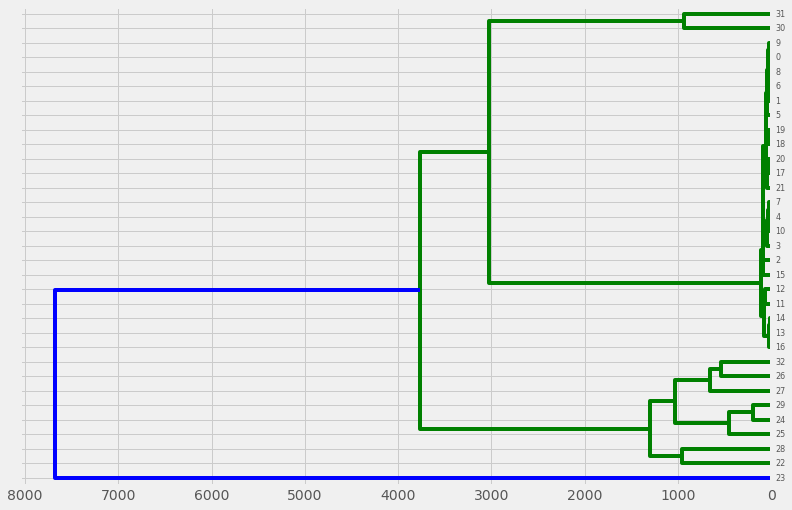

In [101]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z, orientation='left')

In [98]:
max_dist = 2900
clusters2k_comp = hierarchy.fcluster(Z, max_dist, criterion='distance')
clusters2k_comp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       4, 1, 1, 1, 1, 1, 1, 3, 3, 1], dtype=int32)

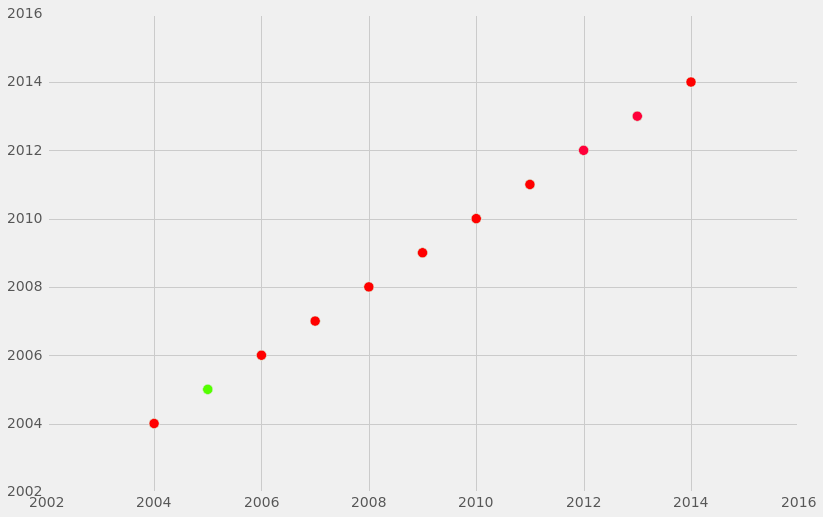

In [99]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters2k_comp, cmap='prism', s=100);

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier